# compute change of fundamentals

In [ ]:
import wrds
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_colwidth', 100) 
pd.set_option('display.width', 1000)  

conn = wrds.Connection(wrds_username='george_gkolemis')

#Compustat
query = """
SELECT conm, cusip, tic, tpci, datadate, exchg, prccd, ajexdi

FROM  comp_na_daily_all.secd

WHERE 
    datadate BETWEEN '2014-12-20' AND '2024-01-01'
    AND tpci IN ('0') -- Limiting the search to stocks only
    AND exchg IN (11) -- Limiting the search to NYSE (11) or/and NASDAQ (14)
    AND iid = '01' --Some companies have multiple classes of stocks. Here taking only class A
"""

df_price = conn.raw_sql(query, params=None)
conn.close()
df_price['cusip'] = df_price['cusip'].str[:-1]

df_price['adjusted_price'] = df_price['prccd'] / df_price['ajexdi']
df_price['datadate'] = pd.to_datetime(df_price['datadate'])
df_price

Loading library list...
Done


,conm,cusip,tic,tpci,datadate,exchg,prccd,ajexdi,adjusted_price
0,AAR CORP,00036110,AIR,0,2014-12-22,11,27.4800,1.0,27.4800
1,AAR CORP,00036110,AIR,0,2014-12-23,11,28.3000,1.0,28.3000
2,AAR CORP,00036110,AIR,0,2014-12-24,11,27.6700,1.0,27.6700
3,AAR CORP,00036110,AIR,0,2014-12-26,11,27.7400,1.0,27.7400
4,AAR CORP,00036110,AIR,0,2014-12-29,11,28.2700,1.0,28.2700
...,...,...,...,...,...,...,...,...,...
149775,PROPERTYGURU GROUP LIMITED,G7258M10,PGRU,0,2023-12-22,11,3.2633,1.0,3.2633
149776,PROPERTYGURU GROUP LIMITED,G7258M10,PGRU,0,2023-12-26,11,3.3100,1.0,3.3100
149777,PROPERTYGURU GROUP LIMITED,G7258M10,PGRU,0,2023-12-27,11,3.2600,1.0,3.2600
149778,PROPERTYGURU GROUP LIMITED,G7258M10,PGRU,0,2023-12-28,11,3.3300,1.0,3.3300


In [164]:
adj_price_df = df_price[['cusip', 'datadate', 'adjusted_price']].copy().set_index(['datadate', 'cusip']).unstack()
#adj_price_df = adj_price_df.ffill()

return_df = adj_price_df/adj_price_df.shift(1)-1
return_df.columns = return_df.columns.get_level_values(1)
#return_df

In [165]:
monthly_return = (return_df+1).rolling(21).apply(np.prod, raw=True) - 1
monthly_volatility = return_df.rolling(21).std()
monthly_sharpe = monthly_return/monthly_volatility
monthly_return

cusip,00036110,00090Q10,00095710,00101J10,00105510,00108410,00120410,00122850,00130H10,00152K20,00154710,00165C30,00174410,00184X10,00187Y10,00191G10,00191U10,00206R10,00212110,00217Y10,00244410,00247410,00258W10,00282410,00287Y10,00289620,00423910,00434L10,00436Q10,00489Q10,00508Y10,00509810,00737L10,00751Y10,00766T10,00773T10,00778610,00780010,00782L10,00790R10,00790X10,00817Y10,00825210,00835Q20,00846U10,00847410,00849210,00857U10,00891610,00912X30,...,M8737E10,M8893U10,M9607U11,M9T95110,N0098510,N1450610,N2094410,N3144W10,N3167Y10,N3346210,N4727910,N5374510,N7248214,N8240510,N9420910,P1666E10,P1699413,P3107610,T9224W10,V7780T10,Y0207T10,Y0436Q10,Y0553W10,Y1023010,Y1771G10,Y1968P12,Y2065G12,Y2066G10,Y2067610,Y2106R11,Y2188B10,Y2294C10,Y2687W10,Y2990R10,Y3262R10,Y4105310,Y4671710,Y4812510,Y6213210,Y6213410,Y6215914,Y6219711,Y6226740,Y6417710,Y7388L10,Y7542C13,Y8564M10,Y8565J10,Y8977Y10,Y9384M10
datadate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-26,-0.073886,0.121870,0.105046,NaN,-0.014709,0.056724,NaN,0.246124,0.14353

# Functions for calculating metrics

In [167]:
zscore = lambda x: (x - x.mean())/x.std()

In [168]:
#DataFrame to Store Features and Target
#add target
target= monthly_return.shift(-21).stack(dropna=False).copy().to_frame()
target.columns = ['monthly_return']
#target=target.groupby(level=0).transform(zscore)
target

monthly_return
datadate   cusip                   
2014-12-22 00036110        0.031295
           00090Q10             NaN
           00095710        0.035100
           00101J10       -0.001713
           00105510       -0.047519
...                             ...
2023-12-29 Y7542C13             NaN
           Y8564M10             NaN
           Y8565J10             NaN
           Y8977Y10             NaN
           Y9384M10             NaN

[5033936 rows x 1 columns]

In [169]:
def RSI(return_df, n):
    '''
    data frame of returns (col: stock, row: dates)
    n: number of days to look back 

    returns PIT RSI observed in the previous n_days
    
    '''
    #Keep magnitude of gain (up) or losses (down) for calculating avg
    up=return_df.map(lambda x : x if x>0 else 0, na_action= 'ignore')
    down=return_df.map(lambda x : -x if x<0 else 0, na_action= 'ignore')

    avg_up=up.shift(1).rolling(n).mean()
    avg_down=down.shift(1).rolling(n).mean()
    
    n_day_rsi = 100 - (100/ (1+ avg_up/avg_down))
    return n_day_rsi

In [170]:
def TSI(price, smooth_1 = 25, smooth_2 = 13):
    '''
    Double Smoothed PC
    ------------------
    PC = Current Price minus Prior Price
    First Smoothing = 25-period EMA of PC
    Second Smoothing = 13-period EMA of 25-period EMA of PC
    
    Double Smoothed Absolute PC
    ---------------------------
    Absolute Price Change |PC| = Absolute Value of Current Price minus Prior Price
    First Smoothing = 25-period EMA of |PC|
    Second Smoothing = 13-period EMA of 25-period EMA of |PC|
    
    TSI = 100 x (Double Smoothed PC / Double Smoothed Absolute PC)
    data frame of price (col: stock, row: dates)
    smooth_1:
    smooth_2: 

    returns PIT RSI observed in the previous n_days
    '''
    pc= price-price.shift(1)
    apc= abs(pc)
    #double smooth pc
    ema_pc = pc.ewm(span=smooth_1, axis=0, adjust=False).mean()
    ema_ema_pc = ema_pc.ewm(span=smooth_2, axis=0, adjust=False).mean()

    #double smooth apc
    ema_apc = apc.ewm(span=smooth_1, axis=0, adjust=False).mean()
    ema_ema_apc = ema_apc.ewm(span=smooth_2, axis=0, adjust=False).mean()
    #calculate tsi
    tsi = ema_ema_pc/ema_ema_apc * 100

    pit_tsi= tsi.shift(1)

    #only return days with sufficient smoothing
    return pit_tsi.iloc[smooth_1:, :]

In [171]:
def rolling_momentum(dataframe, months=12, exclude_last_month=True, 
                     smoothing_type='sma', smoothing_window=3, 
                     weight_recent=True):

    """
    Calculates the rolling momentum with optional smoothing and recent-weighting adjustments.

    Args:
    - dataframe (pd.DataFrame): DataFrame with daily price data, columns as stock tickers, rows as dates.
    - months (int): Number of months to calculate momentum over (default is 12).
    - exclude_last_month (bool): Whether to exclude the most recent month in calculation (default is True).
    - smoothing_type (str): Type of smoothing to apply; 'sma' (simple moving average) or 'ewma' (exponentially weighted moving average).
    - smoothing_window (int): Window size for smoothing in SMA (default is 3).
    - weight_recent (bool): If True, applies recent weighting using EWMA with specified span.
    - ewm_span (int): The span parameter for EWMA, controlling the decay rate (default is 3).

    Returns:
    - momentum_df (pd.DataFrame): DataFrame containing the rolling momentum for each stock.
    """

    dataframe = dataframe.copy()
    dataframe.index = pd.to_datetime(dataframe.index)

    # Calculate momentum over the specified period
    if exclude_last_month:
        shifted_df = dataframe.shift(21)  # assuming 21 trading days per month
        momentum_df = (shifted_df - dataframe.shift(252)) / dataframe.shift(252)
    else:
        momentum_df = (dataframe - dataframe.shift(252)) / dataframe.shift(252)

    # Apply smoothing based on the chosen method
    if smoothing_type == 'sma':
        smoothed_momentum = momentum_df.rolling(window=smoothing_window, min_periods=1).mean()
    elif smoothing_type == 'ewma':
        smoothed_momentum = momentum_df.ewm(span=smoothing_window, adjust=False).mean()
    else:
        smoothed_momentum = momentum_df

    return smoothed_momentum

In [172]:
def generate_momentum_features(dataframe, sma_windows=[3, 5, 10, 50, 100], ema_windows=[3, 5, 10, 50, 100], months=12):
    """
    Generates momentum features for specified SMA and EMA windows.
    
    Args:
    - dataframe (pd.DataFrame): DataFrame with daily price data, columns as stock tickers, rows as dates.
    - sma_windows (list): List of windows for SMA-based momentum features.
    - ema_windows (list): List of windows for EMA-based momentum features.
    - months (int): Number of months to calculate momentum over (default is 12).

    Returns:
    - features_df (pd.DataFrame): DataFrame with momentum features and monthly returns.
    """
    # Copy and setup
    adj_price_df = dataframe.copy()
    adj_price_df.index = pd.to_datetime(adj_price_df.index)
    momentum_features = {}

    # Generate SMA features
    for sma_window in sma_windows:
        col_name = f"Momentum_SMA_{sma_window}"
        # Stack to align (date, ticker) structure
        momentum_features[col_name] = rolling_momentum(adj_price_df, smoothing_type='sma', smoothing_window=sma_window).stack()
        #print(f"{col_name} shape:", momentum_features[col_name].shape)

    # Generate EMA features
    for ema_window in ema_windows:
        col_name = f"Momentum_EMA_{ema_window}"
        # Stack to align (date, ticker) structure
        momentum_features[col_name] = rolling_momentum(adj_price_df, smoothing_type='ewma', smoothing_window=ema_window).stack()
        #print(f"{col_name} shape:", momentum_features[col_name].shape)

    # Combine features into a single DataFrame (columns become feature names, index is date and ticker)
    features_df = pd.concat(momentum_features, axis=1)
    features_df.columns = list(momentum_features.keys())
    
    #PIT
    features_df = features_df.shift(1)
    return features_df

In [173]:
rsi = RSI(return_df, 15)
rsi = rsi.transform(zscore , axis=1)
rsi = rsi.stack().to_frame()
rsi.columns = ['rsi']

In [174]:
tsi = TSI(return_df, 15)
tsi = tsi.transform(zscore , axis=1)
tsi = tsi.stack().to_frame()
tsi.columns = ['tsi']

In [175]:
momentum = generate_momentum_features(adj_price_df, sma_windows=[], ema_windows=[3, 10])
#get zscore
momentum = momentum.groupby('cusip').transform(lambda x: x.pct_change())
momentum = momentum.groupby(level=0).transform(zscore)

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [176]:
price_features = pd.concat([target, rsi], axis=1).dropna()
price_features = price_features.clip(-3,3)
price_features

monthly_return       rsi
datadate   cusip                             
2015-01-15 00036110        0.087616 -0.429306
           00095710        0.035052  1.238232
           00101J10        0.163137 -0.162418
           00105510        0.086994 -1.593281
           00108410        0.159572 -0.218668
...                             ...       ...
2023-10-24 Y6213210        0.038301  0.516804
           Y6219711        0.022727  1.746585
           Y6226740        0.020255 -0.342560
           Y7388L10        0.081325  0.382338
           Y7542C13        0.003008  1.566951

[2943999 rows x 2 columns]

### Fundamental Factors

Identifiers for GIC sectors

Energy 10 <br>
Materials 15<br>
Industrials 20<br>
Consumer Discretionary 25<br>
Consumer Staples 30<br>
Health Care 35<br>
Financials 40<br>
Information Technology 45<br>
Telecommunication 50<br>
Utilities 55<br>
Real Estate 60

In [ ]:
conn = wrds.Connection(wrds_username='george_gkolemis')

#Compustat
query = """
SELECT cusip, public_date, rd_sale, 1/ps as sp, bm, roa, accrual, sale_equity, at_turn

FROM wrdsapps_finratio.firm_ratio

WHERE 
    public_date BETWEEN '2014-12-20' AND '2024-01-01'
    --AND gsector IN ('35') -- Adjust sector according the numbers above 
"""

df_factors = conn.raw_sql(query, params=None)
conn.close()
df_factors.columns = ['cusip', 'datadate', 'R&D/S', 'S/P', 'B/M','ROA', 'Accrual/Assets', 'S/Eq', 'at_turn']
df_factors['datadate'] = pd.to_datetime(df_factors['datadate'])

df_factors

Loading library list...
Done


,cusip,datadate,R&D/S,S/P,B/M,ROA,Accrual/Assets,S/Eq,at_turn
0,00036110,2014-12-31,0.0,1.438130,1.056290,0.098555,-0.030358,1.607178,0.724740
1,00036110,2015-01-31,0.0,1.419489,1.147529,0.091727,-0.021361,1.622207,0.732017
2,00036110,2015-02-28,0.0,1.383761,1.147529,0.091727,-0.021361,1.622207,0.732017
3,00036110,2015-03-31,0.0,1.324333,1.147529,0.091727,-0.021361,1.622207,0.732017
4,00036110,2015-04-30,0.0,1.333307,0.922611,0.077371,-0.013480,1.621189,0.729650
...,...,...,...,...,...,...,...,...,...
403927,45339J10,2023-08-31,0.0,NaN,1.160794,-0.538779,-0.027057,NaN,NaN
403928,45339J10,2023-09-30,0.0,NaN,1.160794,-0.538779,-0.027057,NaN,NaN
403929,45339J10,2023-10-31,0.0,NaN,1.160794,-0.538779,-0.027057,NaN,NaN
403930,45339J10,2023-11-30,0.0,NaN,0.662526,-0.635430,-0.085743,NaN,NaN


In [180]:
#for some reason there are duplicates and I take the average if thats the case (5% of the dataset)
df_factors = df_factors.groupby(['datadate', 'cusip'], as_index=False).mean()
#Chnage in bm, at turn, sales equity
bm = df_factors[['cusip', 'datadate', 'B/M']].copy().set_index(['datadate', 'cusip']).unstack()
#bm = bm.fillna(method='ffill')
bm_change = (bm - bm.rolling(6).mean().shift()) / bm.rolling(6).mean().shift()
bm_change = bm_change.stack()
bm_change.columns = ['bm_change']

at_turn = df_factors[['cusip', 'datadate', 'at_turn']].copy().set_index(['datadate', 'cusip']).unstack()
#at_turn = at_turn.fillna(method='ffill')
at_turn_change = (at_turn - at_turn.rolling(6).mean().shift()) / at_turn.rolling(6).mean().shift()
at_turn_change = at_turn_change.stack()
at_turn_change.columns = ['at_turn_change']

sales_equity = df_factors[['cusip', 'datadate', 'S/Eq']].copy().set_index(['datadate', 'cusip']).unstack()
#sales_equity = sales_equity.fillna(method='ffill')
sales_equity_change = (sales_equity - sales_equity.rolling(6).mean().shift()) / sales_equity.rolling(6).mean().shift()
sales_equity_change = sales_equity_change.stack()
sales_equity_change.columns = ['S/Eq_change']



In [181]:
pd.concat([bm_change, at_turn_change, sales_equity_change], axis=1)

bm_change  at_turn_change  S/Eq_change
datadate   cusip                                           
2015-06-30 00036020  -0.139568       -0.030825    -0.009640
           00036110  -0.127431       -0.000500     0.001128
           00081T10  -0.145601       -0.001117    -0.013902
           00086810   0.026988       -0.000539     0.004693
           00095710  -0.098815       -0.026725    -0.025557
...                        ...             ...          ...
2023-03-31 10258P10        NaN             NaN     0.148949
2023-04-30 10258P10        NaN             NaN     0.102086
2023-08-31 46571210        NaN             NaN     0.058624
2023-09-30 46571210        NaN             NaN     0.054243
2023-10-31 46571210        NaN             NaN     0.049897

[353879 rows x 3 columns]

In [182]:

#calculate zscores
fundamental_f = df_factors.copy().set_index(['datadate', 'cusip'])
fundamental_f = fundamental_f[['R&D/S', 'S/P', 'B/M', 'ROA', 'Accrual/Assets', 'S/Eq']]
fundamental_f = pd.concat([fundamental_f, bm_change, at_turn_change, sales_equity_change], axis=1)
fundamental_f = fundamental_f.groupby(level=0).transform(zscore)

#uncomment and list the factors you want to omit
#fundamental_f = fundamental_f.drop(columns=[])

fundamental_f

R&D/S       S/P       B/M       ROA  Accrual/Assets      S/Eq  bm_change  at_turn_change  S/Eq_change
datadate   cusip                                                                                                             
2014-12-31 00036020 -0.037858 -0.464308 -0.642697  0.508933        0.031091 -0.018231        NaN             NaN          NaN
           00036110 -0.037980  0.139600  0.662046  0.140880        0.070500 -0.018572        NaN             NaN          NaN
           00081T10 -0.037875  0.284962  0.820999  0.147797        0.093510 -0.017869        NaN             NaN          NaN
           00086810 -0.037980 -0.417198  0.537642  0.024834        0.119096 -0.019599        NaN             NaN          NaN
           00095710 -0.037980  1.036696  0.022832  0.128519        0.086109 -0.015390        NaN             NaN          NaN
...                       ...       ...       ...       ...             ...       ...        ...             ...          ...
2023-12-31 98983V10 -0.033511 -0.405862 -0.596397  0.046233       -0.273109 -0.016589   1.004705       -0.140124     0.670745
           98985Y10 -0.033338 -0.303717  0.105542  1.058302        0.517539 -0.027971   0.340883       -0.534742    -0.563593
           98986M10 -0.033800 -0.348346 -0.521153  0.590876        0.415309 -0.020208   0.409738       -0.228039     0.139990
           98987D10 -0.033853       NaN  2.371407 -0.153729        0.427774       NaN  -0.733746             NaN          NaN
           G6516310 -0.033853       NaN -0.493690 -0.465164       -0.229508       NaN  -0.263206             NaN          NaN

[399368 rows x 9 columns]

In [183]:
price_and_fundamentals = pd.merge(price_features, fundamental_f, on =['datadate','cusip'], how='outer')
price_and_fundamentals[fundamental_f.columns] = price_and_fundamentals.groupby('cusip')[fundamental_f.columns].ffill()

price_and_fundamentals

monthly_return  rsi     R&D/S       S/P       B/M       ROA  Accrual/Assets      S/Eq  bm_change  at_turn_change  S/Eq_change
datadate   cusip                                                                                                                                  
2014-12-31 00036020             NaN  NaN -0.037858 -0.464308 -0.642697  0.508933        0.031091 -0.018231        NaN             NaN          NaN
           00036110             NaN  NaN -0.037980  0.139600  0.662046  0.140880        0.070500 -0.018572        NaN             NaN          NaN
           00081T10             NaN  NaN -0.037875  0.284962  0.820999  0.147797        0.093510 -0.017869        NaN             NaN          NaN
           00086810             NaN  NaN -0.037980 -0.417198  0.537642  0.024834        0.119096 -0.019599        NaN             NaN          NaN
           00095710             NaN  NaN -0.037980  1.036696  0.022832  0.128519        0.086109 -0.015390        NaN             NaN          NaN
...                             ...  ...       ...       ...       ...       ...             ...       ...        ...             ...          ...
2023-12-31 98983V10             NaN  NaN -0.033511 -0.405862 -0.596397  0.046233       -0.273109 -0.016589   1.004705       -0.140124     0.670745
           98985Y10             NaN  NaN -0.033338 -0.303717  0.105542  1.058302        0.517539 -0.027971   0.340883       -0.534742    -0.563593
           98986M10             NaN  NaN -0.033800 -0.348346 -0.521153  0.590876        0.415309 -0.020208   0.409738       -0.228039     0.139990
           98987D10             NaN  NaN -0.033853       NaN  2.371407 -0.153729        0.427774       NaN  -0.733746             NaN          NaN
           G6516310             NaN  NaN -0.033853       NaN -0.493690 -0.465164       -0.229508       NaN  -0.263206             NaN          NaN

[3278197 rows x 11 columns]

Trended Momentum

In [185]:
from joblib import Parallel, delayed
from scipy.stats import linregress
import time
from multiprocessing import Value, Lock

def compute_trend_clarity_for_dates(cusip, company_data, dates, trailing_rows, exclude_last_month_rows, min_data_points):
    """
    Compute trend clarity for a single company's specified dates with additional regression metrics.
    """
    results = []

    for current_date in dates:
        # Find the current position of the date in the DataFrame
        try:
            current_idx = company_data.index.get_loc(current_date)
        except KeyError:
            continue

        # Define the range for lookback
        start_idx = current_idx - (trailing_rows + exclude_last_month_rows)
        end_idx = current_idx - exclude_last_month_rows

        # Ensure indices are valid
        if start_idx < 0:
            results.append({'datadate': current_date, 'cusip': cusip, 'trend_clarity': np.nan,
                            'alpha': np.nan, 'beta': np.nan, 'p_value': np.nan})
            continue

        # Extract the lookback data using row indices
        lookback_data = company_data.iloc[start_idx:end_idx]

        # Skip if insufficient data
        if len(lookback_data) < min_data_points:
            results.append({'datadate': current_date, 'cusip': cusip, 'trend_clarity': np.nan,
                            'alpha': np.nan, 'beta': np.nan, 'p_value': np.nan})
            continue

        # Extract x (time) and y (prices)
        y = lookback_data['adjusted_price'].values
        x = np.arange(len(y))

        # Skip if constant prices
        if np.all(y == y[0]):
            results.append({'datadate': current_date, 'cusip': cusip, 'trend_clarity': np.nan,
                            'alpha': np.nan, 'beta': np.nan, 'p_value': np.nan})
            continue

        # Compute regression metrics
        slope, intercept, r_value, p_value, _ = linregress(x, y)
        results.append({'datadate': current_date, 'cusip': cusip,
                        'trend_clarity': r_value,  # R-squared
                        'alpha': intercept,       # Alpha
                        'beta': slope,            # Beta
                        'p_value': p_value})      # P-value

    return results


def compute_trend_clarity_parallel(df, trailing_days=252, exclude_last_month=21, min_data_points=200, compute_every_day=True, n_jobs=-1):
    """
    Compute trend clarity for all companies with additional regression metrics on specified dates using parallel processing.

    Args:
    - df (pd.DataFrame): MultiIndex DataFrame with adjusted prices.
    - trailing_days (int): Lookback window for regression.
    - exclude_last_month (int): Rows to exclude.
    - min_data_points (int): Minimum data points.
    - compute_every_day (bool): If True, compute daily; otherwise, compute only EOM.
    - n_jobs (int): Number of parallel jobs to run.

    Returns:
    - trend_clarity_df (pd.DataFrame): DataFrame with trend clarity and regression metrics.
    """
    # Reset index for processing
    df = df.reset_index()
    df['datadate'] = pd.to_datetime(df['datadate'])

    if compute_every_day:
        # Use all unique dates for each company
        dates_df = df[['cusip', 'datadate']].groupby('cusip')['datadate'].unique()
    else:
        # Identify EOM rows
        eom_mask = df.groupby(['cusip', df['datadate'].dt.to_period('M')])['datadate'].transform('max') == df['datadate']
        eom_df = df[eom_mask]
        dates_df = eom_df[['cusip', 'datadate']].groupby('cusip')['datadate'].unique()

    # Prepare tasks for parallel processing
    tasks = [
        (name, df[df['cusip'] == name].set_index('datadate').sort_index(), dates, trailing_days, exclude_last_month, min_data_points)
        for name, dates in dates_df.items()
    ]

    # Run parallel processing
    results = Parallel(n_jobs=n_jobs, backend='loky')(
        delayed(compute_trend_clarity_for_dates)(*task) for task in tasks
    )

    # Combine results
    flat_results = [item for sublist in results for item in sublist]
    trend_clarity_df = pd.DataFrame(flat_results).set_index(['datadate', 'cusip'])

    return trend_clarity_df


In [186]:
df = df_price.copy()
df = df.set_index(['datadate', 'cusip'])
# Split the companies into 5 batches of 500
all_companies = df.index.get_level_values('cusip').unique()
batches = [all_companies[i:i + 500] for i in range(0, len(all_companies), 500)]

# Placeholder for storing results from all batches
all_results = []

# Process each batch sequentially
for i, batch in enumerate(batches, 1):
    print(f"Processing batch {i}/{len(batches)} with {len(batch)} companies...")
    
    # Filter data for the current batch
    df_batch = df[df.index.get_level_values('cusip').isin(batch)]
    
    # Compute trend clarity and additional metrics for the current batch
    trend_metrics_df_batch = compute_trend_clarity_parallel(
        df_batch,
        trailing_days=252,
        exclude_last_month=21,
        min_data_points=200,
        n_jobs=-1  # Use parallel processing
    )
    
    # Save results
    all_results.append(trend_metrics_df_batch)
    print(f"Completed batch {i}/{len(batches)}")
    
    # Optionally save intermediate results to disk
    trend_metrics_df_batch.to_csv(f"trend_metrics_batch_{i}.csv")
    print(f"Batch {i} saved to trend_metrics_batch_{i}.csv")

# Combine all results
final_trend_metrics_df = pd.concat(all_results)

# Merge the results back into the original DataFrame
df = df.reset_index()
df = df.merge(final_trend_metrics_df, on=['datadate', 'cusip'], how='left')

# Debugging: Inspect final results
print("\n--- Final Trend Metrics ---")
print(final_trend_metrics_df.dropna().head())


Processing batch 1/5 with 500 companies...
Completed batch 1/5
Batch 1 saved to trend_metrics_batch_1.csv
Processing batch 2/5 with 500 companies...
Completed batch 2/5
Batch 2 saved to trend_metrics_batch_2.csv
Processing batch 3/5 with 500 companies...
Completed batch 3/5
Batch 3 saved to trend_metrics_batch_3.csv
Processing batch 4/5 with 500 companies...
Completed batch 4/5
Batch 4 saved to trend_metrics_batch_4.csv
Processing batch 5/5 with 204 companies...
Completed batch 5/5
Batch 5 saved to trend_metrics_batch_5.csv

--- Final Trend Metrics ---
                     trend_clarity      alpha      beta       p_value
datadate   cusip                                                     
2016-01-25 00036110      -0.692362  31.725883 -0.034795  2.673390e-37
2016-01-26 00036110      -0.694118  31.732817 -0.034890  1.483932e-37
2016-01-27 00036110      -0.694153  31.725442 -0.034892  1.466778e-37
2016-01-28 00036110      -0.694911  31.726239 -0.034933  1.136250e-37
2016-01-29 00036110  

In [187]:
import glob

# Step 1: Locate and read all trend clarity CSVs in the current directory
trend_clarity_files = glob.glob("./trend_metrics*.csv")  # Adjust path if needed
print(f"Found {len(trend_clarity_files)} trend metrics files.")

# Step 2: Read and combine all trend clarity CSVs into a single DataFrame
trend_clarity_list = [pd.read_csv(file) for file in trend_clarity_files]
trend_clarity_combined = pd.concat(trend_clarity_list, ignore_index=True)

# Ensure the combined DataFrame has the correct dtypes for merging
trend_clarity_combined['datadate'] = pd.to_datetime(trend_clarity_combined['datadate'])
trend_clarity_combined['cusip'] = trend_clarity_combined['cusip'].astype(str)  # Ensure consistent type
trend_clarity_combined.set_index(['datadate', 'cusip'], inplace=True)

# print(f"Combined trend metrics DataFrame shape: {trend_clarity_combined.shape}")

# # Step 3: Reset index in the main DataFrame, explicitly dropping any pre-existing index levels
# df = df.reset_index(drop=True)  # Drop the existing index before resetting
# df['datadate'] = pd.to_datetime(df['datadate'])  # Ensure datadate is in datetime format
# df['cusip'] = df['cusip'].astype(str)  # Ensure consistent type

# # Merge on 'datadate' and 'cusip'
# df = pd.merge(df, trend_clarity_combined, on=['datadate', 'cusip'], how='left')

# # Step 4: Restore the MultiIndex
# df.set_index(['datadate', 'cusip'], inplace=True)

# # Debugging: Inspect the merged DataFrame
# print(f"Merged DataFrame shape: {df.shape}")
# print("Merged DataFrame with trend metrics (head):")
# print(df.head())

trend_clarity_combined = trend_clarity_combined.sort_values('datadate')
#keep only the first index for duplicates
trend_clarity_combined = trend_clarity_combined[~trend_clarity_combined.index.duplicated(keep='first')]
trend_clarity_combined

Found 6 trend metrics files.


trend_clarity       alpha      beta       p_value
datadate   cusip                                                      
1993-12-20 90991410            NaN         NaN       NaN           NaN
1993-12-21 90991410            NaN         NaN       NaN           NaN
1993-12-22 90991410            NaN         NaN       NaN           NaN
1993-12-23 90991410            NaN         NaN       NaN           NaN
1993-12-27 90991410            NaN         NaN       NaN           NaN
...                            ...         ...       ...           ...
2023-12-29 69888410       0.627888   28.499329  0.042974  4.890463e-29
           31738L20      -0.299606   16.535474 -0.012516  1.271340e-06
           04343610       0.395926  197.648165  0.108082  6.920679e-11
           03110010       0.594594  139.831440  0.060344  1.748894e-25
           88262P10      -0.446058  672.280266 -0.664465  1.006273e-13

[4156360 rows x 4 columns]

In [188]:
trend_clarity_combined.describe()

,trend_clarity,alpha,beta,p_value
count,3.449120e+06,3.449120e+06,3.449120e+06,3.449120e+06
mean,7.218876e-02,2.485985e+02,5.724239e-02,3.042611e-02
std,6.600578e-01,7.730995e+03,7.822935e+00,1.301065e-01
min,-9.879719e-01,-6.789938e+01,-1.161315e+03,2.968483e-233
25%,-5.953015e-01,1.640842e+01,-2.279822e-02,2.333943e-69
50%,1.292956e-01,3.179604e+01,3.143843e-03,2.436359e-34
75%,7.352624e-01,6.320548e+01,3.517426e-02,1.096580e-10
max,9.929100e-01,4.866618e+05,6.229137e+02,9.999852e-01


In [189]:
((trend_clarity_combined.trend_clarity * trend_clarity_combined.beta)<0).sum()

0

In [190]:
trend_clarity_combined.beta.map(lambda x: 0 if abs(x)<0.01 else x)

datadate    cusip   
1993-12-20  90991410         NaN
1993-12-21  90991410         NaN
1993-12-22  90991410         NaN
1993-12-23  90991410         NaN
1993-12-27  90991410         NaN
                          ...   
2023-12-29  69888410    0.042974
            31738L20   -0.012516
            04343610    0.108082
            03110010    0.060344
            88262P10   -0.664465
Name: beta, Length: 4156360, dtype: float64

In [191]:
trend_clarity_combined.trend_clarity**2 * trend_clarity_combined.beta.map(lambda x: 0 if abs(x)<0.01 else x)

datadate    cusip   
1993-12-20  90991410         NaN
1993-12-21  90991410         NaN
1993-12-22  90991410         NaN
1993-12-23  90991410         NaN
1993-12-27  90991410         NaN
                          ...   
2023-12-29  69888410    0.016942
            31738L20   -0.001123
            04343610    0.016943
            03110010    0.021334
            88262P10   -0.132207
Length: 4156360, dtype: float64

In [192]:
momentum = trend_clarity_combined.trend_clarity**2 * trend_clarity_combined.beta.map(lambda x: x if abs(x)>0.01 else 0)
momentum = momentum.groupby(level=0).transform(zscore)
momentum.name = 'momentum'

price_fundamentals_momentum = pd.concat([price_and_fundamentals, momentum], axis=1)
price_fundamentals_momentum

monthly_return  rsi     R&D/S       S/P       B/M       ROA  Accrual/Assets      S/Eq  bm_change  at_turn_change  S/Eq_change  momentum
datadate   cusip                                                                                                                                            
2014-12-31 00036020             NaN  NaN -0.037858 -0.464308 -0.642697  0.508933        0.031091 -0.018231        NaN             NaN          NaN       NaN
           00036110             NaN  NaN -0.037980  0.139600  0.662046  0.140880        0.070500 -0.018572        NaN             NaN          NaN       NaN
           00081T10             NaN  NaN -0.037875  0.284962  0.820999  0.147797        0.093510 -0.017869        NaN             NaN          NaN       NaN
           00086810             NaN  NaN -0.037980 -0.417198  0.537642  0.024834        0.119096 -0.019599        NaN             NaN          NaN       NaN
           00095710             NaN  NaN -0.037980  1.036696  0.022832  0.128519        0.086109 -0.015390        NaN             NaN          NaN       NaN
...                             ...  ...       ...       ...       ...       ...             ...       ...        ...             ...          ...       ...
2023-12-29 69888410             NaN  NaN       NaN       NaN       NaN       NaN             NaN       NaN        NaN             NaN          NaN -0.023777
           31738L20             NaN  NaN       NaN       NaN       NaN       NaN             NaN       NaN        NaN             NaN          NaN -0.026166
           04343610             NaN  NaN       NaN       NaN       NaN       NaN             NaN       NaN        NaN             NaN          NaN -0.023777
           03110010             NaN  NaN       NaN       NaN       NaN       NaN             NaN       NaN        NaN             NaN          NaN -0.023197
           88262P10             NaN  NaN       NaN       NaN       NaN       NaN             NaN       NaN        NaN             NaN          NaN -0.043495

[4476488 rows x 12 columns]

### Analyst recommendations

STRONG BUY 1<br>
BUY 2<br>
HOLD 3<br>
UNDEPERFORM 4<br>
SELL 5

In [ ]:
conn = wrds.Connection(wrds_username='george_gkolemis')

#Compustat
query = """
SELECT cusip, anndats, ireccd

FROM  tr_ibes.recddet

WHERE 
    anndats BETWEEN '2014-12-20' AND '2024-01-01'
"""

df_rec = conn.raw_sql(query, params=None)
conn.close()
df_rec = df_rec.dropna()
#turn ratings into integers and rename the date column to be the same as the other frames
df_rec['ireccd'] = df_rec['ireccd'].astype(int)
df_rec['anndats'] = pd.to_datetime(df_rec['anndats'])
df_rec.columns = ['cusip', 'datadate', 'ireccd']

df_rec = df_rec.groupby(['datadate', 'cusip']).mean().reset_index()
df_rec

Loading library list...
Done


,datadate,cusip,ireccd
0,2014-12-20,FI613584,2.0
1,2014-12-20,FQ633608,2.0
2,2014-12-20,FQ646156,2.0
3,2014-12-20,FQ648936,3.0
4,2014-12-20,FQ664681,2.0
...,...,...,...
746276,2024-01-01,FKBJVLVG,4.0
746277,2024-01-01,FM631114,3.0
746278,2024-01-01,FSBPYCTY,2.0
746279,2024-01-01,FTBKFBJ8,5.0


In [195]:
# compute change and zscore of recommendations
#df_rec['ireccd'] = df_rec.groupby('cusip')['ireccd'].pct_change()
df_rec = df_rec.set_index(['datadate', 'cusip'])
df_rec = df_rec.groupby(level=0).transform(zscore)

target_features = pd.merge(price_fundamentals_momentum, df_rec, on =['datadate','cusip'], how='outer')
#forward filling assuming that recommendation will change when it should change
target_features['ireccd'] = target_features.groupby('cusip')['ireccd'].ffill()
#target_features['ireccd'] = target_features['ireccd'].fillna(0)


#start from the same date as target features
min_date = price_features.index.get_level_values(0)[0]
target_features = target_features[target_features.index.get_level_values(0) >= min_date]
target_features = target_features.dropna()
#cap zscores to -3 and 3
target_features = target_features.clip(-3,3)
target_features

monthly_return       rsi     R&D/S       S/P       B/M       ROA  Accrual/Assets      S/Eq  bm_change  at_turn_change  S/Eq_change  momentum    ireccd
datadate   cusip                                                                                                                                                           
2016-01-25 00036110        0.014741 -1.073634 -0.049028  0.083800  0.323419  0.093053        0.234712 -0.046523  -0.015034        0.129200    -0.180526  0.029062 -0.739851
           00095710        0.112069  1.408352 -0.049028  0.576494 -0.084298  0.207405        0.056623  0.009790   0.047077        0.070502    -0.194461  0.029975  0.377497
           00101J10        0.390565 -0.837376 -0.049028 -0.305579 -0.005232  0.488310       -0.136843 -0.055839   0.080217        0.032636     0.110745  0.029469  0.491782
           00105510        0.054465  0.015259 -0.049028 -0.244434 -0.041346  0.111978        0.072804 -0.056594  -0.285848       -0.038543    -0.167200  0.029975 -0.517343
           00108410        0.064407  1.147497 -0.048645  0.207416  0.040398  0.274590        0.014877 -0.032140  -0.236953       -0.132925    -0.058118  0.029975  0.610651
...                             ...       ...       ...       ...       ...       ...             ...       ...        ...             ...          ...       ...       ...
2023-10-24 98956P10        0.085750 -0.509339 -0.084508 -0.433140 -0.341313  0.410200        0.208377 -0.071819  -0.248091        0.024215    -0.098808 -0.025265  0.566243
           98978V10        0.073181 -0.468155 -0.084399 -0.497923 -0.683808  0.678635        0.442741 -0.053055  -0.108409       -0.019749    -0.123524 -0.015808 -0.247412
           98980B10        0.198880 -0.615740 -0.082869 -0.245010 -0.724343  0.478712        0.066354  0.285691   0.019163       -0.677994     0.480482 -0.027753  0.789397
           98983L10        0.188776 -0.666612 -0.085170 -0.430100 -0.374891  0.398422        0.115963 -0.066233  -0.548588       -0.526941    -0.223544 -0.027160  0.777168
           98983V10        0.066062 -0.193051 -0.081902 -0.409677 -0.673602 -0.007259       -0.791288 -0.029763  -0.852653       -0.396605    -0.232493 -0.027010 -0.484677

[1466235 rows x 13 columns]

In [196]:
target_features.corr()

,monthly_return,rsi,R&D/S,S/P,B/M,ROA,Accrual/Assets,S/Eq,bm_change,at_turn_change,S/Eq_change,momentum,ireccd
monthly_return,1.000000,-0.011118,-0.012323,0.041298,0.037314,-0.045147,-0.024802,0.007548,-0.002008,-0.004565,0.006719,0.023249,-0.000568
rsi,-0.011118,1.000000,-0.007391,-0.030345,-0.015689,0.015008,0.006442,0.004516,-0.012296,0.007293,0.006759,0.015518,-0.045781
R&D/S,-0.012323,-0.007391,1.000000,0.018103,0.025342,0.042054,-0.048003,-0.004281,-0.043027,0.033214,0.017211,-0.000693,-0.011961
S/P,0.041298,-0.030345,0.018103,1.000000,0.342162,-0.006089,-0.051498,0.231358,0.091415,-0.002747,0.030474,-0.053806,0.052466
B/M,0.037314,-0.015689,0.025342,0.342162,1.000000,-0.165617,0.039482,-0.188426,0.140322,-0.011160,-0.047931,-0.047194,0.026699
ROA,-0.045147,0.015008,0.042054,-0.006089,-0.165617,1.000000,0.160205,0.057991,0.010809,-0.002745,-0.039106,0.068109,0.027484
Accrual/Assets,-0.024802,0.006442,-0.048003,-0.051498,0.039482,0.160205,1.000000,-0.041790,0.050365,-0.029016,-0.098417,0.015516,-0.008113
S/Eq,0.007548,0.004516,-0.004281,0.231358,-0.188426,0.057991,-0.041790,1.000000,-0.058973,-0.000217,0.273178,0.004031,0.012831
bm_change,-0.002008,-0.012296,-0.043027,0.091415,0.140322,0.010809,0.050365,-0.058973,1.000000,-0.080657,-0.141770,-0.127241,0.017791
at_turn_change,-0.004565,0.007293,0.033214,-0.002747,-0.011160,-0.002745,-0.029016,-0.000217,-0.080657,1.000000,0.340698,0.027053,0.003062


### Helper Functions for Backtest

In [198]:
import cvxpy as cp
def RPP(long_df, short_df ,c=None):
    #merge df of returns for both long and short stocks
    df = long_df.join(-short_df)
    short_n = short_df.shape[1]
    #calculate covariance matrix
    mat = df.cov().to_numpy()
    n = mat.shape[0]

    # addresses the case in which matrix is not PSD and optimization is non-convex
    def nearest_psd(matrix):
        eigvals, eigvecs = np.linalg.eigh(matrix)
        eigvals[eigvals < 0] = 0  #replace negative eigenvalues with 0
        return eigvecs @ np.diag(eigvals) @ eigvecs.T
    eigenvalues = np.linalg.eigvals(mat)
    if not np.all(eigenvalues >= 0):
        print("Covariance matrix not PSD. Fixing it.")
        mat = nearest_psd(mat)
        
    #if risk distribution not specified, assign equal allocation
    if c is None:
        c = np.ones(n) / n
    else:
        c = np.abs(c)
    #solve optimization problem
    x=cp.Variable(n)
    formula=cp.quad_form(x, mat)/2 -c@cp.log(x)
    constraints= [
        x >= 0
    ]
    
    problem=cp.Problem(cp.Minimize(formula), constraints)   
    problem.solve()
    x_solved=x.value
    
    #caculate weights
    w=x_solved/sum(x_solved)
    #calculate rrc
    volatility=np.sqrt(w.T @ mat @ w)
    rrc=w*(mat@w)/volatility**2

    #Turn weights of short stocks to negative
    w[-short_n:] = -w[-short_n:]
    #w = w/w.sum()
    
    return w

In [199]:
import cvxpy as cp
def MinVar_market_neutral(long_df, short_df, betas ,c=None):
    #merge df of returns for both long and short stocks
    df = long_df.join(-short_df)
    short_n = short_df.shape[1]
    #calculate covariance matrix
    mat = df.cov().to_numpy()
    n = mat.shape[0]

    # addresses the case in which matrix is not PSD and optimization is non-convex
    def nearest_psd(matrix):
        eigvals, eigvecs = np.linalg.eigh(matrix)
        eigvals[eigvals < 0] = 0  #replace negative eigenvalues with 0
        return eigvecs @ np.diag(eigvals) @ eigvecs.T
    eigenvalues = np.linalg.eigvals(mat)
    if not np.all(eigenvalues >= 0):
        print("Covariance matrix not PSD. Fixing it.")
        mat = nearest_psd(mat)
        
    #if risk distribution not specified, assign equal allocation
    if c is None:
        c = np.ones(n) / n
    else:
        c = np.abs(c)
    #solve optimization problem
    x=cp.Variable(n)
    formula=cp.quad_form(x, mat)/2
    constraints= [
        x >= 0,
        betas @ x == 0, #market neutral constraint
        cp.sum(x) == 1
    ]
    
    problem=cp.Problem(cp.Minimize(formula), constraints)   
    problem.solve()
    w=x.value

    #Turn weights of short stocks to negative
    w[-short_n:] = -w[-short_n:]
    #w = w/w.sum()
    
    return w

In [200]:
#Function to aggregate portfolio return from stock returns
def daily_return(stock_returns, w):
    #calculate cumulative returns of each stock
    cumulative_returns=np.cumprod(stock_returns+1)
    daily_weight = cumulative_returns.transform(lambda x: (x*w).div((x*w).abs().sum(axis=1), axis=0))
    daily_weight = daily_weight.shift(1)
    daily_weight.iloc[0,:] = w
    
    #aggregated returns with the caculated weights
    weighted_returns=stock_returns*daily_weight
    portfolio_return=weighted_returns.sum(axis=1)
    
    return portfolio_return

### Download S&P500 data and create function to calculate stock betas

In [ ]:
conn = wrds.Connection(wrds_username='george_gkolemis')

#Compustat
query_sp500 = f"""

SELECT datadate, prccd

FROM  comp_na_daily_all.idx_daily

WHERE 
    gvkeyx='000003'
    AND datadate BETWEEN '2014-12-20' AND '2024-01-01'
"""

df_sp500 = conn.raw_sql(query_sp500, params=None)
conn.close()
df_sp500['datadate'] = pd.to_datetime(df_sp500['datadate'])
df_sp500['daily_sp500_return'] = df_sp500['prccd'].pct_change()
df_sp500 = df_sp500[1:len(df_sp500)]
df_sp500 = df_sp500.set_index('datadate').drop(columns= ['prccd'])
df_sp500

Loading library list...
Done


,daily_sp500_return
datadate,
2014-12-23,0.001746
2014-12-24,-0.000139
2014-12-26,0.003310
2014-12-29,0.000862
2014-12-30,-0.004889
...,...
2023-12-22,0.001660
2023-12-26,0.004232
2023-12-27,0.001430


In [203]:
from scipy import stats
def calculate_betas(long_cusip, short_cusip, date):
    betas = []
    market_df = df_sp500[(df_sp500.index <= date) & (df_sp500.index>= (date - pd.DateOffset(months=36)))]
    all_cusips = long_cusip + short_cusip
    for stock in all_cusips:
        stock_df = return_df[(return_df.index <= date) & (return_df.index >= (date - pd.DateOffset(months=36)))][stock]
        combined_df = pd.merge(market_df, stock_df, how='inner', on='datadate').dropna()
        beta, _, _, _, _ = stats.linregress(combined_df['daily_sp500_return'], combined_df[stock])
        if stock in long_cusip:
            betas.append(beta)
        elif stock in short_cusip:
            betas.append(-beta)
    
    return betas

In [204]:
target_features = target_features[['monthly_return', 'rsi', 'R&D/S', 
                                   'S/P', 'B/M', 'ROA', 'Accrual/Assets', 
                                   'S/Eq', 'bm_change', 'at_turn_change', 
                                   'S/Eq_change', 'momentum']]

In [205]:
'''
BACKTEST
get list for days we trade
 for each day
    retrieve historical data from target_features dataframe
    run regression (ridge)
    use data from today (in target_features) to predict return and rank stocks

    pick top stocks to include in portfolio
    retreive historical return data for selected stocks

    create RPP
    calculate realized returns
    store in dataframe
'''
from sklearn.linear_model import Lasso
#get dates needed for backtest
start_of_month = target_features.index.get_level_values(0).to_series().groupby(pd.Grouper(freq='M')).min().dropna().drop_duplicates()
target_features_date_index = target_features.index.get_level_values(0)
last_day = target_features.index.get_level_values(0)[-1]

#store results
feature_weights =pd.DataFrame(columns = ['intercept'] +  target_features.columns.to_list()[1:])
#weights_df = []
rpp_return_list = []
bn_return_list = []
ew_return_list = []

exclude = 0
n_stocks = 40

for i in range(10,len(start_of_month)):
    date = start_of_month[i]
    #mark historical training data date
    train_start = date - pd.DateOffset(months=12)
    train_end = date -pd.DateOffset(days=21)
    #mark end date of this holding period
    if i == len(start_of_month)-1:
        end_date = last_day
    else:
        end_date = start_of_month[i+1]

    if date == end_date:
        continue

    #fit regression model to get weights of features
    train_x = target_features[(target_features_date_index>=train_start) & (target_features_date_index<train_end)].iloc[:,1:]
    train_y = target_features[(target_features_date_index>=train_start) & (target_features_date_index<train_end)].iloc[:,0]
    date_x = target_features[target_features_date_index==date].iloc[:,1:]
    
    #fit regression
    model = Lasso(alpha=1e-3, fit_intercept=True, max_iter = 10000)
    model.fit(train_x, train_y)
    #store result of regression
    feature_weights.loc[date] = [model.intercept_]+ model.coef_.tolist()
    #predict stock returns in the coming month
    predict_y = model.predict(date_x)
    y_df = pd.DataFrame({'stock': date_x.index.get_level_values(1),
                         'return': predict_y
                        })
    #determine which stocks to long and short
    y_df = y_df.sort_values('return', ascending = False)
    if exclude!=0:
        long = y_df.stock.iloc[exclude : exclude+n_stocks].to_list()
        short = y_df.stock.iloc[-(exclude + n_stocks): -exclude].to_list()
    else:
        long = y_df.stock.iloc[ : exclude+n_stocks].to_list()
        short = y_df.stock.iloc[-(exclude + n_stocks): ].to_list()
    #retrieve historical returns of stocks for portfolio construction
    long_hist_return = return_df[(return_df.index>=train_start) & (return_df.index<train_end)][long]
    short_hist_return = return_df[(return_df.index>=train_start) & (return_df.index<train_end)][short]
    
    # betas here
    betas = calculate_betas(long_hist_return.columns.to_list(), short_hist_return.columns.to_list(), date)

    #compute weights for each stock
    rpp_w = RPP(long_hist_return, short_hist_return)
    bn_w = MinVar_market_neutral(long_hist_return, short_hist_return, betas)
    ew = np.array([1/(2*n_stocks)]*n_stocks + [-1/(2*n_stocks)]*n_stocks)

    #get returns of the coming period
    long_return = return_df[(return_df.index>=date) & (return_df.index<end_date)][long]
    short_return = return_df[(return_df.index>=date) & (return_df.index<end_date)][short]
    ret = long_return.join(short_return)

    rpp_period_return = daily_return(ret, rpp_w)
    bn_period_return = daily_return(ret, bn_w)
    ew_period_return = daily_return(ret, ew)
    
    rpp_return_list.append(rpp_period_return)
    bn_return_list.append(bn_period_return)
    ew_return_list.append(ew_period_return)

rpp_portfolio_return = pd.concat(rpp_return_list)
bn_portfolio_return = pd.concat(bn_return_list)
ew_portfolio_return = pd.concat(ew_return_list)

In [206]:
portfolio_return = pd.concat([rpp_portfolio_return, bn_portfolio_return, ew_portfolio_return], axis=1)
portfolio_return.columns = ['RPP', 'BN', 'EW']
portfolio_return

,RPP,BN,EW
datadate,,,
2016-11-01,-0.008200,-0.018632,-0.007798
2016-11-02,0.001648,0.000751,0.000851
2016-11-03,0.002152,0.003427,-0.001011
2016-11-04,0.003543,0.002274,0.004506
2016-11-07,-0.005347,-0.003439,-0.002805
...,...,...,...
2023-10-17,0.001210,0.000213,0.005173
2023-10-18,0.000935,-0.001674,0.002454
2023-10-19,-0.001341,-0.002166,-0.005140


<Axes: xlabel='datadate'>

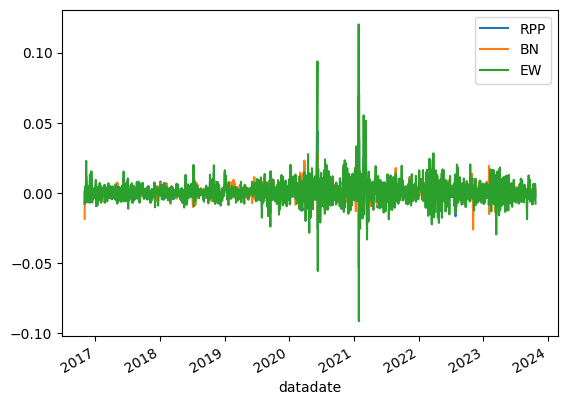

In [207]:
portfolio_return.plot()

In [208]:
cumulative_return = np.cumprod(portfolio_return+1) -1
cumulative_return.plot()

In [209]:
#cumulative_sp500 = np.cumprod(df_sp500.loc[df_sp500.index.intersection(cumulative_return.index)]+1) -1
#
#ax = cumulative_return.plot(y='portfolio_return', label='Portfolio', legend=True)
#cumulative_sp500.plot(y='daily_sp500_return', label='S&P500', ax=ax, legend=True)
#
#plt.show()

In [210]:
portfolio_return.mean()/portfolio_return.std()*np.sqrt(252)

In [211]:
df_sp500

,daily_sp500_return
datadate,
2014-12-23,0.001746
2014-12-24,-0.000139
2014-12-26,0.003310
2014-12-29,0.000862
2014-12-30,-0.004889
...,...
2023-12-22,0.001660
2023-12-26,0.004232
2023-12-27,0.001430


In [212]:
combined_df = portfolio_return.merge(df_sp500, how='left', left_index=True, right_index=True).fillna(0)
rpp_beta, _, _, _, _ = stats.linregress(combined_df['daily_sp500_return'], combined_df['RPP'])
rpp_beta

0.02501887795771642

In [213]:
EW_beta, _, _, _, _ = stats.linregress(combined_df['daily_sp500_return'], combined_df['EW'])
EW_beta

-0.001425384393078803

In [214]:
BN_beta, _, _, _, _ = stats.linregress(combined_df['daily_sp500_return'], combined_df['BN'])
BN_beta

0.0514325954064414

In [215]:
cumulative_snp_return = np.cumprod(combined_df+1) -1
cumulative_snp_return.plot()

In [216]:
combined_df.mean()/combined_df.std()*np.sqrt(252)

In [269]:
feature_weights

,intercept,rsi,R&D/S,S/P,B/M,ROA,Accrual/Assets,S/Eq,bm_change,at_turn_change,S/Eq_change,momentum
2016-11-01,0.027652,-0.004570,-0.0,0.000000,0.010311,0.000000,-0.0,-0.0,0.008982,0.0,0.0,0.000000
2016-12-01,0.035327,-0.004899,0.0,0.000740,0.016253,-0.000000,-0.0,-0.0,0.007828,0.0,-0.0,-0.000000
2017-01-03,0.035600,-0.004325,0.0,0.001742,0.017904,-0.000000,-0.0,-0.0,0.007175,-0.0,-0.0,-0.000000
2017-02-01,0.032386,-0.004107,0.0,0.001122,0.015547,-0.000000,-0.0,-0.0,0.005842,-0.0,-0.0,-0.000000
2017-03-01,0.024476,-0.002083,0.0,0.000000,0.010149,-0.001492,-0.0,-0.0,0.001291,-0.0,-0.0,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01,-0.016965,-0.000537,-0.0,0.000736,-0.000000,0.003452,-0.0,0.0,-0.005649,-0.0,0.0,0.016051
2023-07-03,-0.004269,-0.000134,-0.0,0.002325,-0.000000,0.000000,-0.0,0.0,-0.005028,-0.0,-0.0,0.012783
2023-08-01,0.003953,-0.000186,-0.0,0.003249,0.000000,-0.001571,-0.0,0.0,-0.001138,-0.0,-0.0,0.011027
2023-09-01,0.009788,-0.000455,-0.0,0.009779,0.000000,0.000000,-0.0,-0.0,-0.000342,0.0,-0.0,0.008081


<Axes: >

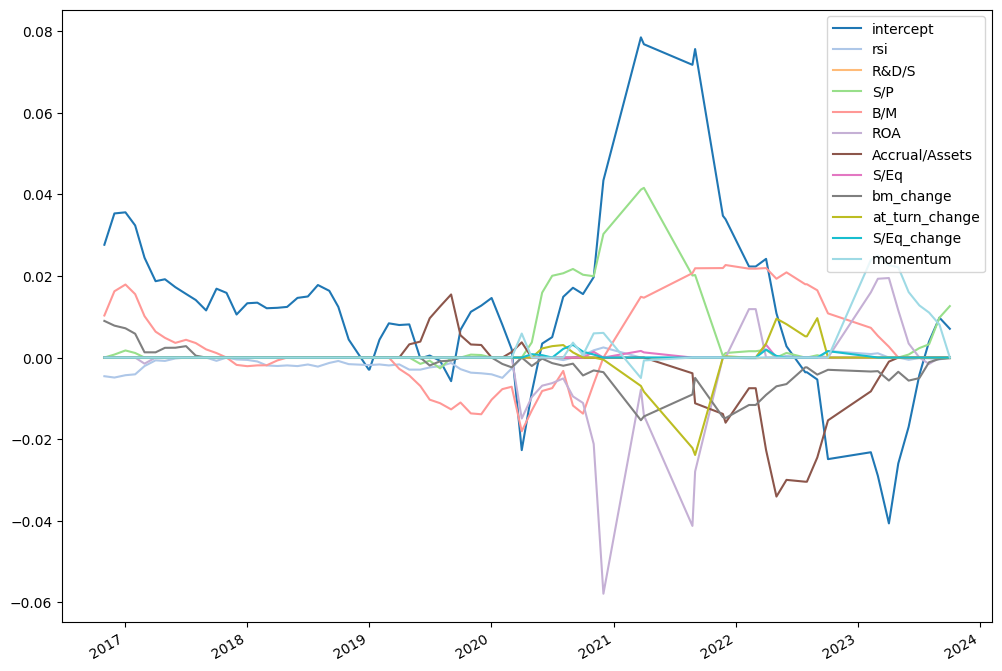

In [271]:
feature_weights.plot(figsize=(12, 9), colormap = 'tab20')